**Desafio do Módulo 2**

In [8]:
# carrega as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# leitura do dataset
df = pd.read_csv('https://pycourse.s3.amazonaws.com/banknote_authentication.txt',
                 header=None,
                 names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [20]:
col_ranges = df.max() - df.min()
col_ranges

variance    13.8669
skewness    26.7247
curtosis    23.2135
entropy     10.9977
class        1.0000
dtype: float64

In [21]:
df['skewness'].mean()

1.9223531206393603

In [22]:
df['entropy'].mean()

-1.191656520043731

In [24]:
df['variance'].median()  # mediana

0.49618

In [25]:
df['curtosis'].std()  # desvio padrão

4.310030090106595

In [38]:
df[df['class']==1].info() # 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 762 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  610 non-null    float64
 1   skewness  610 non-null    float64
 2   curtosis  610 non-null    float64
 3   entropy   610 non-null    float64
 4   class     610 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 28.6 KB


In [40]:
# Correlação de Pearson
from scipy.stats import pearsonr

corr, _ = pearsonr(df['skewness'], df['curtosis'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.787


#### Preparação das variáveis de entrada (X) e saída (y)

In [5]:
X = df.iloc[:, :-1] #variance, skewness, curtosis e entropy
y = df.iloc[:, 4] #somente o class

In [6]:
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [7]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

#### Divisão em treinamento e teste

In [53]:
# importa a biblioteca necessária
from sklearn.model_selection import train_test_split

In [54]:
# faz a divisão de 30% teste e o resto para treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1,
                                                    test_size=.3)

#### Algoritmo Rede MLP

In [55]:

from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(hidden_layer_sizes=(2,), solver='lbfgs', random_state=1)

In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf_mlp.fit(X_train, y_train)

# predição com X_test
y_pred = clf_mlp.predict(X_test)

#calculando as métricas
print(classification_report(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

1.0


#### Algoritmo KNN

In [57]:
#importando as bibliotecas 
import pylab as pl # utilizado para plotar os gráficos
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier

In [58]:
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
y_pred = clf_KNN.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[234   1]
 [  0 177]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       0.99      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



**Árvore de decisão**

In [62]:
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão
from sklearn import metrics #importa as métricas para avaliação

In [66]:
# Cria o objeto de classificação através do 
clf = DecisionTreeClassifier(random_state=1)

# Realiza o treinamento do classificador
clf = clf.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)

In [67]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[231   4]
 [  1 176]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       235
           1       0.98      0.99      0.99       177

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [74]:
clf.score(X_test, y_test)

0.9878640776699029

**Random Forest**

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
clf_floresta = RandomForestClassifier(max_depth=8, random_state=1)

In [70]:
clf_floresta.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [72]:
#Realiza a previsão de classificaçao 
y_pred = clf_floresta.predict(X_test)

In [73]:
clf_floresta.score(X_test, y_test)

0.9951456310679612

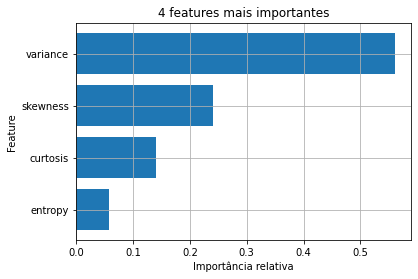

In [77]:
# importâncias das features
fp = clf_floresta.feature_importances_
n = 4
i = np.argsort(fp)[-n:]
cols = X_train.columns
plt.barh(cols[i], fp[i])
plt.grid()
plt.title(f"{n} features mais importantes")
plt.xlabel("Importância relativa")
plt.ylabel("Feature")
plt.show()

**SVM**

In [79]:
from sklearn.svm import SVC

In [80]:
clf_svm = SVC(gamma='auto',kernel='rbf', random_state=1)

In [81]:
clf_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [82]:
y_pred = clf_svm.predict(X_test)

In [84]:
clf_svm.score(X_test, y_test)  ## esse comando trás a ACURÁCIA (accurracy)

1.0